In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [0]:
Train, Test = boston_housing.load_data()

In [15]:
XT,YT = Train
print(XT.shape,YT.shape)
Xt, Yt = Test
print(Xt.shape,Yt.shape)

(404, 13) (404,)
(102, 13) (102,)


In [0]:
mean = XT.mean(axis=0)
std = XT.std(axis=0)

# Data Normalisation Step
XT = (XT-mean)/std
Xt = (Xt-mean)/std

In [0]:
# Build Our Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras import backend as K

def r2_score(y_true,y_pred):
    
    
    num = K.sum(K.square(y_true-y_pred))
    denom = K.sum(K.square(y_true- K.mean(y_true)))
    return (1-num/denom)

def getModel():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(13,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
    return model
    

In [25]:
model = getModel()
model.summary()
#hist = model.fit(XT,YT,verbose=1,epochs=)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist = model.fit(XT,YT,epochs=30,validation_data=(Xt,Yt),verbose=1)

Train on 404 samples, validate on 102 samples
Epoch 1/30
404/404 [==============================] - 0s 992us/step - loss: 557.9547 - r2_score: -6.4975 - val_loss: 558.9702 - val_r2_score: -6.2839
Epoch 2/30
404/404 [==============================] - 0s 58us/step - loss: 508.1520 - r2_score: -5.6722 - val_loss: 500.4050 - val_r2_score: -5.5131
Epoch 3/30
404/404 [==============================] - 0s 53us/step - loss: 445.2363 - r2_score: -5.1222 - val_loss: 424.2359 - val_r2_score: -4.5154
Epoch 4/30
404/404 [==============================] - 0s 55us/step - loss: 367.3338 - r2_score: -3.6617 - val_loss: 330.7539 - val_r2_score: -3.2939
Epoch 5/30
404/404 [==============================] - 0s 52us/step - loss: 273.5656 - r2_score: -2.3729 - val_loss: 232.2295 - val_r2_score: -2.0108
Epoch 6/30
404/404 [==============================] - 0s 60us/step - loss: 182.7740 - r2_score: -1.3186 - val_loss: 145.6840 - val_r2_score: -0.8934
Epoch 7/30
404/404 [==============================] - 0s 60

In [0]:
hist.history?

In [0]:
val_loss = hist.history['val_loss']
train_loss = hist.history['loss']

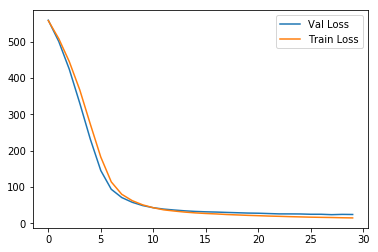

In [30]:
import matplotlib.pyplot as plt

plt.plot(val_loss,label="Val Loss ")
plt.plot(train_loss,label="Train Loss")
plt.legend()
plt.show()

In [0]:
r2_score_train = hist.history['r2_score']
r2_score_val = hist.history['val_r2_score']

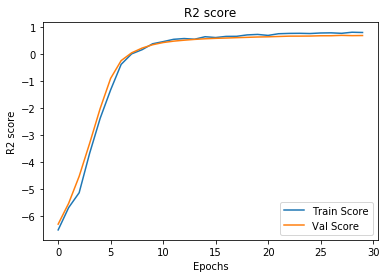

In [36]:
plt.plot(r2_score_train,label="Train Score")
plt.plot(r2_score_val,label="Val Score")
plt.legend()
plt.title("R2 score")
plt.xlabel("Epochs")
plt.ylabel("R2 score")
plt.show()


In [41]:
r2_score = model.evaluate(Xt,Yt)[1]
print(r2_score)

102/102 [==============================] - 0s 50us/step
0.6898677372464946


In [42]:
model.predict(Xt)

array([[10.777111 ],
       [15.797907 ],
       [22.19606  ],
       [33.792984 ],
       [26.893496 ],
       [15.776882 ],
       [25.534527 ],
       [22.252895 ],
       [19.901382 ],
       [19.377182 ],
       [14.6543045],
       [16.72829  ],
       [17.91956  ],
       [42.995403 ],
       [17.912703 ],
       [18.736366 ],
       [28.104275 ],
       [19.50152  ],
       [17.686733 ],
       [29.317295 ],
       [13.540848 ],
       [14.27207  ],
       [19.919239 ],
       [12.920851 ],
       [24.151909 ],
       [20.450705 ],
       [32.484295 ],
       [29.937069 ],
       [12.864444 ],
       [21.99556  ],
       [17.841145 ],
       [15.660516 ],
       [31.920015 ],
       [26.427963 ],
       [16.020092 ],
       [10.242045 ],
       [14.538727 ],
       [15.14757  ],
       [22.45066  ],
       [27.363022 ],
       [28.578426 ],
       [29.082281 ],
       [16.694172 ],
       [38.473476 ],
       [32.7933   ],
       [25.401299 ],
       [25.34203  ],
       [14.59